In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Read file
train = pd.read_csv('train.csv')
# train = pd.read_csv('train_smote.csv')
train = train.drop(['ID'], axis = 1)
train_Y = train['Status']
train_X = train.drop(['Status'], axis = 1)

test = pd.read_csv('test.csv')
test = test.drop(['ID'], axis = 1)
test_Y = test['Status']
test_X = test.drop(['Status'], axis = 1)

val = pd.read_csv('val.csv')
val = val.drop(['ID'], axis = 1)
val_Y = val['Status']
val_X = val.drop(['Status'], axis = 1)

In [3]:
# Train the decision tree with different hyperparameters
best_accuracy = 0
best_tree = None
accuracy_depth_train = []
accuracy_depth_val = []
accuracy_depth_test = []
for depth in range(1, 30):  # Exploring different depths
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion="gini")
    tree.fit(train_X, train_Y)
    accuracy_depth_train.append(tree.score(train_X, train_Y))
    accuracy_depth_val.append(tree.score(val_X, val_Y))
    accuracy_depth_test.append(tree.score(test_X, test_Y))

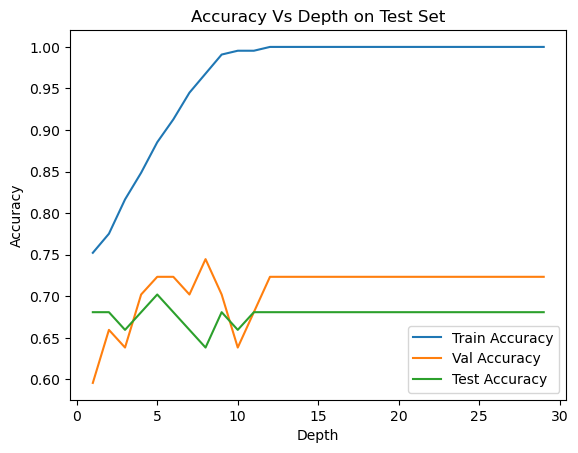

In [4]:
plt.plot(range(1, 30), accuracy_depth_train, label='Train Accuracy')
plt.title('Accuracy Vs Depth on Training Set')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.plot(range(1, 30), accuracy_depth_val, label='Val Accuracy')
plt.title('Accuracy Vs Depth on Validation Set')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.plot(range(1, 30), accuracy_depth_test, label='Test Accuracy')
plt.title('Accuracy Vs Depth on Test Set')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

In [5]:
# Find the maximum value
max_accuracy = max(accuracy_depth_test)

# Find the index of the maximum value
max_accuracy_index = accuracy_depth_test.index(max_accuracy)

print("Maximum Accuracy on test set:", max_accuracy)
print("Index of Maximum Accuracy Tree Depth:", max_accuracy_index)
max_accuracy_index = [max_accuracy_index]

Maximum Accuracy on test set: 0.7021276595744681
Index of Maximum Accuracy Tree Depth: 4


In [6]:
param_grid = {
    'max_depth': [20],
    'min_samples_split': range(2,12),
    'min_samples_leaf': range(2,12),
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(train_X, train_Y)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(test_X, test_Y)
print("Test set accuracy:", test_accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 7}
Best cross-validation accuracy: 0.7249471458773784
Test set accuracy: 0.6382978723404256


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
clf.fit(train_X, train_Y)

predict_Y = clf.predict(test_X)
print("Accuracy:", accuracy_score(test_Y, predict_Y))

Accuracy: 0.7872340425531915


In [8]:
# Train the decision tree with different hyperparameters
best_accuracy = 0
best_tree = None
accuracy_depth_train = []
accuracy_depth_val = []
accuracy_depth_test = []
for depth in range(1, 30):  # Exploring different depths
    tree = RandomForestClassifier(max_depth=depth, random_state=42, criterion="gini")
    tree.fit(train_X, train_Y)
    accuracy_depth_train.append(tree.score(train_X, train_Y))
    accuracy_depth_val.append(tree.score(val_X, val_Y))
    accuracy_depth_test.append(tree.score(test_X, test_Y))

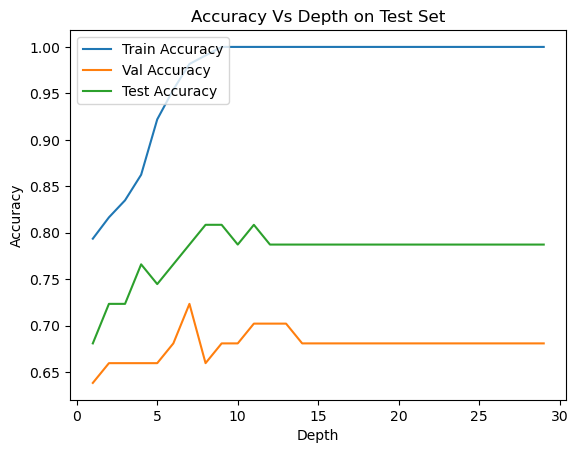

In [9]:
plt.plot(range(1, 30), accuracy_depth_train, label='Train Accuracy')
plt.title('Accuracy Vs Depth on Training Set')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.plot(range(1, 30), accuracy_depth_val, label='Val Accuracy')
plt.title('Accuracy Vs Depth on Validation Set')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.plot(range(1, 30), accuracy_depth_test, label='Test Accuracy')
plt.title('Accuracy Vs Depth on Test Set')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
# Find the maximum value
max_accuracy = max(accuracy_depth_test)
# Find the index of the maximum value
max_accuracy_index = accuracy_depth_test.index(max_accuracy)

print("Maximum Accuracy on test set:", max_accuracy)
print("Index of Maximum Accuracy Tree Depth:", max_accuracy_index)
max_accuracy_index = [max_accuracy_index]

Maximum Accuracy on test set: 0.8085106382978723
Index of Maximum Accuracy Tree Depth: 7


In [11]:
param_grid = {
    'max_depth': max_accuracy_index,
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(2,10),
    'max_features': [None],
    'criterion': ['gini']
}

# Initialize the classifier
dt = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(train_X, train_Y)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(test_X, test_Y)
print("Test set accuracy:", test_accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy: 0.7886892177589853
Test set accuracy: 0.8085106382978723
